# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from statistics import mean
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:
t_city=[]
lat_city=[]
lng_city=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]
units="imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    weather_response = requests.get(query_url).json()
    if (weather_response['cod']=='404'):
        print(f"City not found City name: {city}")
    else:
        print(f"Processing city id: {weather_response['id']} city name: {weather_response['name']}")
        t_city.append(weather_response['name'])
        lat_city.append(weather_response['coord']['lat'])
        lng_city.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
print(f"---------------------------------------------------------------------------")
print(f"Processing completed....")

Processing city id: 2013279 city name: Vostok
Processing city id: 4946620 city name: Palmer
City not found City name: illoqqortoormiut
Processing city id: 3466980 city name: Caravelas
Processing city id: 139223 city name: Chālūs
Processing city id: 3883457 city name: Lebu
Processing city id: 1274747 city name: Chandia
Processing city id: 2075265 city name: Busselton
Processing city id: 2206939 city name: Bluff
City not found City name: taolanaro
Processing city id: 4513583 city name: Hamilton
Processing city id: 4030556 city name: Rikitea
Processing city id: 108410 city name: Riyadh
City not found City name: mys shmidta
Processing city id: 3369157 city name: Cape Town
Processing city id: 358048 city name: Damietta
Processing city id: 1507390 city name: Dikson
Processing city id: 3466704 city name: Castro
Processing city id: 610298 city name: Beyneu
Processing city id: 1630935 city name: Polewali
Processing city id: 2074865 city name: Carnarvon
Processing city id: 3573374 city name: The

Processing city id: 6170031 city name: Tuktoyaktuk
Processing city id: 3453315 city name: Poconé
Processing city id: 3984997 city name: San Quintín
Processing city id: 4470244 city name: Havelock
Processing city id: 1142226 city name: Dawlatabad
Processing city id: 2063042 city name: Port Hedland
Processing city id: 3424607 city name: Tasiilaq
Processing city id: 6094665 city name: Osoyoos
City not found City name: sentyabrskiy
Processing city id: 2017155 city name: Saskylakh
Processing city id: 110690 city name: Faya
Processing city id: 3516017 city name: Tenabo
Processing city id: 1499779 city name: Malinovoye Ozero
City not found City name: maimon
Processing city id: 6063191 city name: Mackenzie
Processing city id: 1726449 city name: Basco
Processing city id: 2206894 city name: Hokitika
Processing city id: 1489853 city name: Tazovsky
Processing city id: 2276492 city name: Harper
Processing city id: 6164499 city name: The Pas
Processing city id: 1650434 city name: Bambanglipuro
Proce

Processing city id: 934649 city name: Cap Malheureux
Processing city id: 3712076 city name: Colón
Processing city id: 933995 city name: Souillac
Processing city id: 3939761 city name: Hualmay
Processing city id: 535839 city name: Leshukonskoye
Processing city id: 2016977 city name: Serebryanyy Bor
Processing city id: 1000543 city name: Graaff-Reinet
Processing city id: 352733 city name: Marsá Maţrūḩ
Processing city id: 2630299 city name: Hofn
Processing city id: 926308 city name: Monkey Bay
Processing city id: 1803936 city name: Wuwei
City not found City name: malwan
City not found City name: samusu
Processing city id: 5870133 city name: Nome
Processing city id: 1047660 city name: Cuamba
Processing city id: 5847411 city name: Kahului
Processing city id: 1847947 city name: Shingū
Processing city id: 2514301 city name: Mahon
Processing city id: 777019 city name: Vardø
City not found City name: jatoi
Processing city id: 2632287 city name: Dalvik
Processing city id: 1701394 city name: Manu

Processing city id: 1252514 city name: Mongar
Processing city id: 454178 city name: Viļāni
Processing city id: 2332515 city name: Lafia
Processing city id: 1787837 city name: Xucheng
Processing city id: 3662574 city name: Rio Branco
Processing city id: 1636426 city name: Manggar
Processing city id: 2396518 city name: Port-Gentil
Processing city id: 1650232 city name: Banjar
Processing city id: 1785738 city name: Yuncheng
Processing city id: 6078372 city name: Moose Factory
City not found City name: bokspits
Processing city id: 5404476 city name: Ukiah
Processing city id: 2644605 city name: Lerwick
Processing city id: 2126710 city name: Beringovskiy
Processing city id: 5942913 city name: Dryden
Processing city id: 1643078 city name: Indramayu
Processing city id: 3357804 city name: Eenhana
Processing city id: 3480908 city name: La Asuncion
Processing city id: 737021 city name: Zonguldak
City not found City name: paucartambo
Processing city id: 3421719 city name: Narsaq
Processing city id

## Convert Raw Data to DataFrame
* Save as csv

In [29]:
weather_info=pd.DataFrame({
            'City':t_city,
            'Lat':lat_city,
            'Lng':lng_city,
            'Max Temp':max_temp,
            'Humidity':humidity,
            'Cloudiness':cloudiness,
            'Wind Speed':wind_speed,
            'Country':country,
            'Date':date
})
weather_info.to_csv(output_data_file, index=False, header=True)

In [30]:
weather_info.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vostok,46.49,135.88,30.15,92,78,5.77,RU,1602595218
1,Palmer,42.16,-72.33,52.00,100,90,8.05,US,1602595343
2,Caravelas,-17.71,-39.25,77.52,85,55,9.13,BR,1602595364
3,Chālūs,36.66,51.42,71.60,56,0,2.24,IR,1602595085
4,Lebu,-37.62,-73.65,53.82,80,0,18.68,CL,1602595364


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

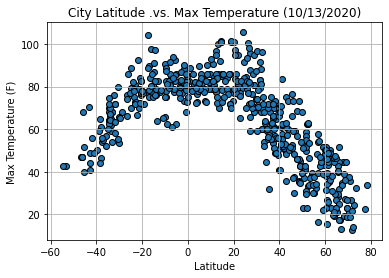

In [42]:
x_values=weather_info['Lat']
y_values=weather_info['Max Temp']
date=time.strftime("%m/%d/%Y")
plt.scatter(x_values,y_values,edgecolor='black')
plt.title("City Latitude .vs. Max Temperature (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

### Latitude vs. Humidity Plot

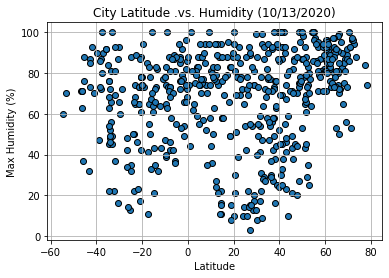

In [43]:
x_values=weather_info['Lat']
y_values=weather_info['Humidity']
date=time.strftime("%m/%d/%Y")
plt.scatter(x_values,y_values,edgecolor='black')
plt.title("City Latitude .vs. Humidity (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Humidity (%)")
plt.grid()
plt.show()

### Latitude vs. Cloudiness Plot

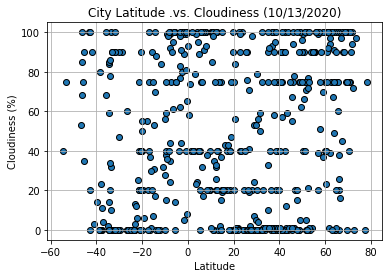

In [44]:
x_values=weather_info['Lat']
y_values=weather_info['Cloudiness']
date=time.strftime("%m/%d/%Y")
plt.scatter(x_values,y_values,edgecolor='black')
plt.title("City Latitude .vs. Cloudiness (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

### Latitude vs. Wind Speed Plot

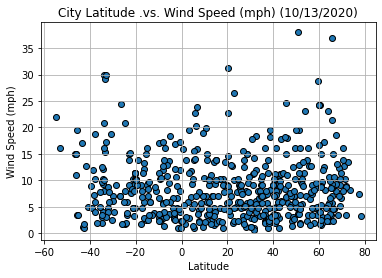

In [45]:
x_values=weather_info['Lat']
y_values=weather_info['Wind Speed']
date=time.strftime("%m/%d/%Y")
plt.scatter(x_values,y_values,edgecolor='black')
plt.title("City Latitude .vs. Wind Speed (mph) (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

## Linear Regression

### Write linear regression plot function (optional)

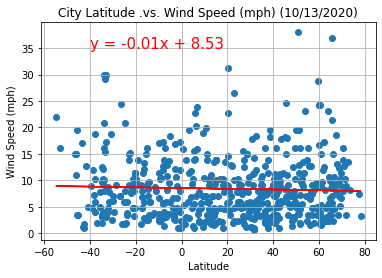

In [56]:
def slope_intercept(xlist,ylist):
    mean_of_x=mean(xlist)
    mean_of_y=mean(ylist)
    
    slope=(((mean_of_x * mean_of_y) - mean(xlist * ylist)) /
          (((mean_of_x)**2) - (mean(xlist**2))))
           
    intercept=mean_of_y - (slope*mean_of_x)
    
    return slope, intercept

#Call lregression function which returns slope and intercept
slope, intercept = slope_intercept(weather_info['Lat'],weather_info['Wind Speed'])          

#Calculate regression line
# formula is y=(slope*x)+intercept
regline=[(slope*x)+intercept for x in weather_info['Lat']]
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))           
plt.scatter(weather_info['Lat'],weather_info['Wind Speed'])
plt.plot(weather_info['Lat'],regline,"r-")
plt.annotate(line_eq,(-40,35),fontsize=15,color="red")
plt.title("City Latitude .vs. Wind Speed (mph) (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()
           
    
           
    

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

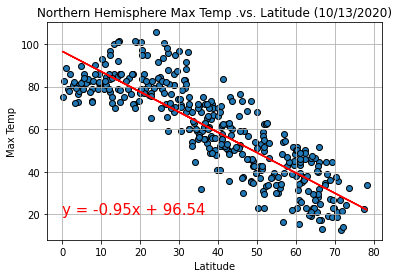

The rvalue is: 0.7363066446621255


In [94]:
equatorlat=0
nh_weather_info=weather_info.loc[weather_info['Lat']>=equatorlat,:]
x_values=nh_weather_info['Lat']
y_values=nh_weather_info['Max Temp']
date=time.strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.title("Northern Hemisphere Max Temp .vs. Latitude (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid()
plt.show()
print(f"The rvalue is: {rvalue**2}")

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

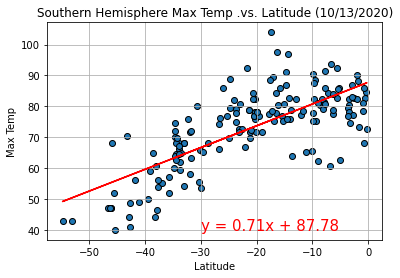

The rvalue is: 0.5537689559457395


In [75]:
equatorlat=0
sh_weather_info=weather_info.loc[weather_info['Lat']<equatorlat,:]
x_values=sh_weather_info['Lat']
y_values=sh_weather_info['Max Temp']
date=time.strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.title("Southern Hemisphere Max Temp .vs. Latitude (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid()
plt.show()
print(f"The rvalue is: {rvalue**2}")

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

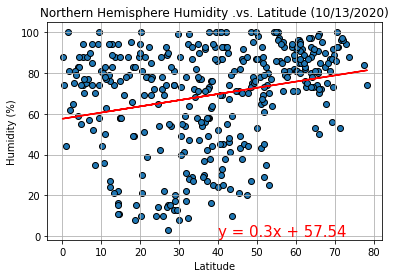

The rvalue is: 0.060083390940361726


In [95]:
equatorlat=0
nh_weather_info=weather_info.loc[weather_info['Lat']>=equatorlat,:]
x_values=nh_weather_info['Lat']
y_values=nh_weather_info['Humidity']
date=time.strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,0),fontsize=15,color="red")
plt.title("Northern Hemisphere Humidity .vs. Latitude (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()
print(f"The rvalue is: {rvalue**2}")

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

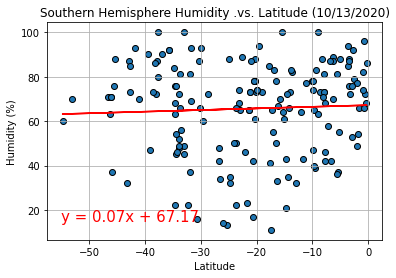

The rvalue is: 0.002240354606070662


In [79]:
equatorlat=0
sh_weather_info=weather_info.loc[weather_info['Lat']<equatorlat,:]
x_values=sh_weather_info['Lat']
y_values=sh_weather_info['Humidity']
date=time.strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.title("Southern Hemisphere Humidity .vs. Latitude (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()
print(f"The rvalue is: {rvalue**2}")

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

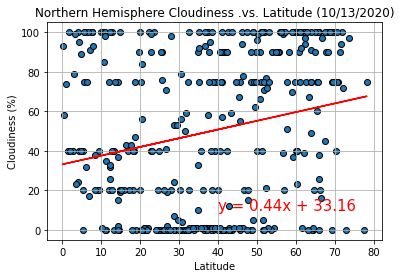

The rvalue is: 0.04820145655837256


In [96]:
equatorlat=0
nh_weather_info=weather_info.loc[weather_info['Lat']>=equatorlat,:]
x_values=nh_weather_info['Lat']
y_values=nh_weather_info['Cloudiness']
date=time.strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.title("Northern Hemisphere Cloudiness .vs. Latitude (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()
print(f"The rvalue is: {rvalue**2}")

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

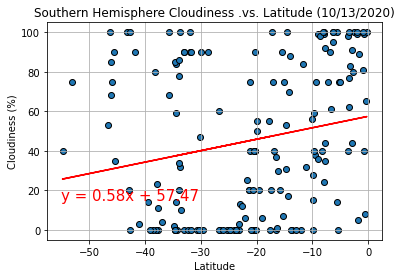

The rvalue is: 0.0422567911939935


In [87]:
equatorlat=0
sh_weather_info=weather_info.loc[weather_info['Lat']<equatorlat,:]
x_values=sh_weather_info['Lat']
y_values=sh_weather_info['Cloudiness']
date=time.strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.title("Southern Hemisphere Cloudiness .vs. Latitude (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()
print(f"The rvalue is: {rvalue**2}")

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

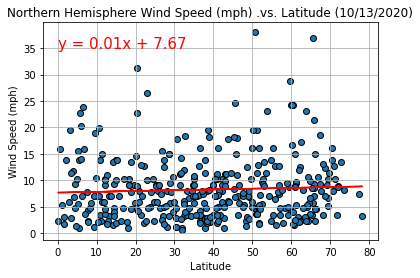

The rvalue is: 0.0025488097486204083


In [97]:
equatorlat=0
nh_weather_info=weather_info.loc[weather_info['Lat']>=equatorlat,:]
x_values=nh_weather_info['Lat']
y_values=nh_weather_info['Wind Speed']
date=time.strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,35),fontsize=15,color="red")
plt.title("Northern Hemisphere Wind Speed (mph) .vs. Latitude (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()
print(f"The rvalue is: {rvalue**2}")

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

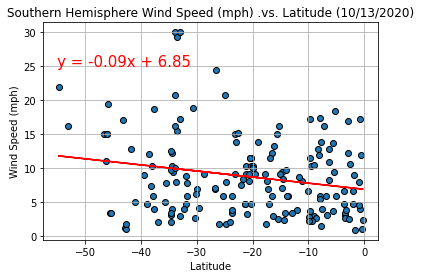

The rvalue is: 0.043217867298613585


In [92]:
equatorlat=0
sh_weather_info=weather_info.loc[weather_info['Lat']<equatorlat,:]
x_values=sh_weather_info['Lat']
y_values=sh_weather_info['Wind Speed']
date=time.strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.title("Southern Hemisphere Wind Speed (mph) .vs. Latitude (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()
print(f"The rvalue is: {rvalue**2}")

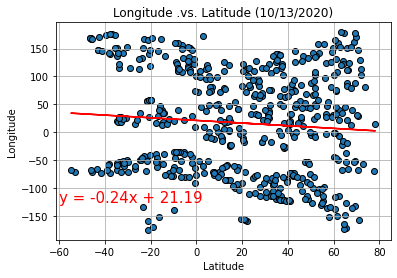

The rvalue is: 0.007289109314663127
The pvalue is: 0.046350023556164605 This is an unnormalized dataset.


In [103]:
x_values=weather_info['Lat']
y_values=weather_info['Lng']
date=time.strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-60,-125),fontsize=15,color="red")
plt.title("Longitude .vs. Latitude (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.grid()
plt.show()
print(f"The rvalue is: {rvalue**2}")
if (pvalue<.05):
    distribution="This is an unnormalized dataset."
else:
    distribution="This is a normalized dataset."
print(f"The pvalue is: {pvalue} {distribution}")